In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [6]:
Image_size = 256
BATCH_SIZE = 32
dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle = True,image_size=(Image_size,Image_size),batch_size=BATCH_SIZE)



Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

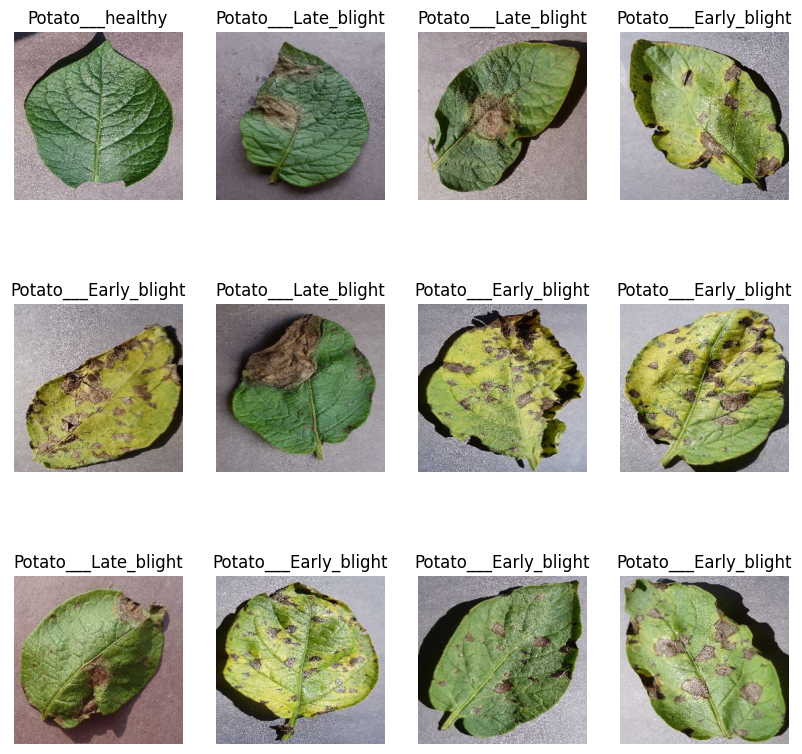

In [44]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [21]:
train_size = 0.8
len(dataset)*train_size    

54.400000000000006

In [22]:
train = dataset.take(54)

In [ ]:
test = dataset.skip(54)

In [23]:
val = 0.1
len(dataset)*val

6.800000000000001

In [ ]:
val_ds = test.take(6)
test_ds = test.skip(6)


In [27]:
def get_partitions(dataset,training = 0.8,val = 0.1,test=0.1,shuffle = True,shuffle_size=10000):
    ds = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=12)
    train_size = int(ds*training)
    train_data = dataset.take(train_size)
    testt = dataset.skip(train_size) 
    val_size = int(ds*val)
    val_data = testt.take(val_size)
    test_data = testt.skip(val_size)
    return train_data,val_data,test_data

In [28]:
train_ds,val_ds,test_ds = get_partitions(dataset)

In [29]:
len(train_ds)

54

In [30]:
len(val_ds)

6

In [33]:
len(test_ds)

8

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [40]:
data_augumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
]
)

In [54]:
input_shape = (BATCH_SIZE,Image_size,Image_size,3)
n_classes = 3
model = models.Sequential([
   resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),  
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 256, 256)           0         
                                                                 
 sequential_1 (Sequential)   (256, 256, 256)           0         
                                                                 
 conv2d_14 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [58]:
model.compile(
        optimizer='adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics= ['accuracy']
)

In [ ]:
history = model.fit(train_ds,epochs=50,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 243s 4s/step - loss: 0.9046 - accuracy: 0.4711 - val_loss: 0.7863 - val_accuracy: 0.6979
Epoch 2/50
54/54 [==============================] - 188s 3s/step - loss: 0.6448 - accuracy: 0.7205 - val_loss: 0.5716 - val_accuracy: 0.7760
Epoch 3/50
 8/54 [===>..........................] - ETA: 2:37 - loss: 0.5721 - accuracy: 0.7422